\newpage

importing libraries

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

#from the archives site no how to import the data set into python

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

1. Classification Problem: Predict whether a patient has heart disease based on medical attributes

2.

In [4]:
df = heart_disease.data.features
print("\nChecking for necessary transformations:")
print(df.info())


Checking for necessary transformations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None


3.

In [5]:
print("\nDataset Description:")
print("Number of observations:", df.shape[0])
print("Number of variables:", df.shape[1])
print("Variable types:\n", df.dtypes.value_counts())
print("\nSummary Statistics:\n", df.describe())


Dataset Description:
Number of observations: 303
Number of variables: 13
Variable types:
 int64      10
float64     3
Name: count, dtype: int64

Summary Statistics:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303

4.

In [7]:
# Merge the 'num' column from y into df
df = df.merge(y, left_index=True, right_index=True)

# Transform 'num' to binary outcome 'target'
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
print("\nTransformed 'num' to binary outcome 'target'.")

#used copilot to help with this question. used the quickfix feature


Transformed 'num' to binary outcome 'target'.


5.

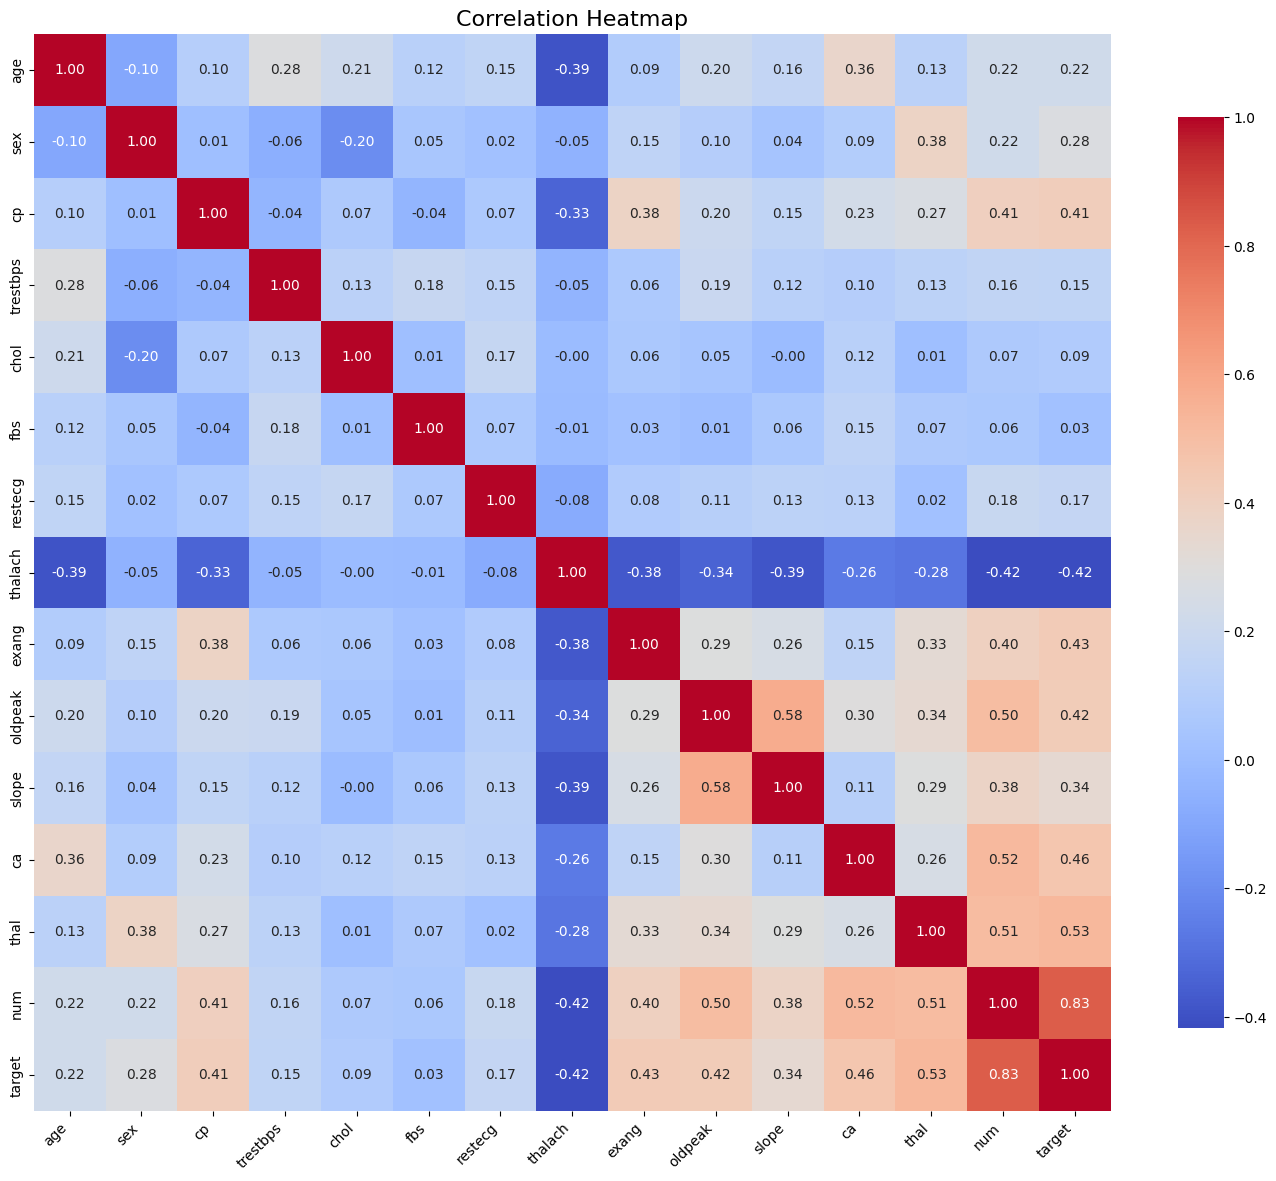

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12)) 
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


6.

In [11]:
initial_rows = df.shape[0]
df = df.dropna()
final_rows = df.shape[0]
print(f"\nDropped {initial_rows - final_rows} rows with missing values.")
print(f"Remaining observations: {final_rows}")


Dropped 6 rows with missing values.
Remaining observations: 297


7.

In [12]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numeric_df = df.drop(columns=categorical_cols + ['target', 'num'])

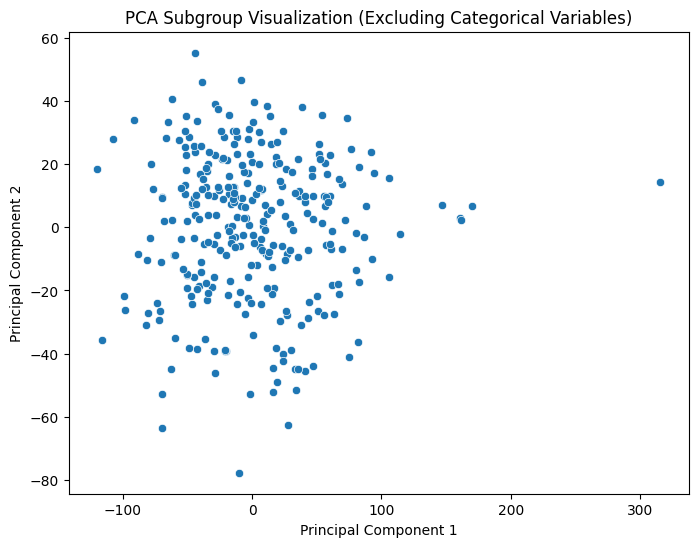

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(numeric_df)
df_pca = pd.DataFrame(data=components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title("PCA Subgroup Visualization (Excluding Categorical Variables)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


8.

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['target', 'num'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(f"\nTrain set size: {X_train.shape[0]} observations")
print(f"Test set size: {X_test.shape[0]} observations")


Train set size: 207 observations
Test set size: 90 observations


9.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

print("Selected classifiers:")
print("1. Logistic Regression - interpretable, simple, and appropriate for binary classification.")
print("2. Random Forest Classifier - handles non-linearities, robust, and provides feature importance.")

Selected classifiers:
1. Logistic Regression - interpretable, simple, and appropriate for binary classification.
2. Random Forest Classifier - handles non-linearities, robust, and provides feature importance.


10.

In [16]:
from sklearn.metrics import accuracy_score, f1_score

print("Evaluation metrics:")
print("- Accuracy: Proportion of total correct predictions.")
print("- F1 Score: Balances precision and recall, useful for uneven class distribution.")


Evaluation metrics:
- Accuracy: Proportion of total correct predictions.
- F1 Score: Balances precision and recall, useful for uneven class distribution.


11.

In [20]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(max_iter=1000)
log_reg_params = {'C': [0.01, 0.1, 1, 10]}
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='f1')
log_reg_cv.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=1)
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='f1')
rf_cv.fit(X_train, y_train)

print("Best Logistic Regression Params:", log_reg_cv.best_params_)
print("Best Random Forest Params:", rf_cv.best_params_)

y_pred_log = log_reg_cv.predict(X_test)
y_pred_rf = rf_cv.predict(X_test)

print("\nTest Accuracy (LogReg):", accuracy_score(y_test, y_pred_log))
print("Test F1 Score (LogReg):", f1_score(y_test, y_pred_log))

print("\nTest Accuracy (RandomForest):", accuracy_score(y_test, y_pred_rf))
print("Test F1 Score (RandomForest):", f1_score(y_test, y_pred_rf))

#used copilot's quickfix feature to help with this question.

C:\Users\owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Best Logistic Regression Params: {'C': 1}
Best Random Forest Params: {'max_depth': 10, 'n_estimators': 200}

Test Accuracy (LogReg): 0.8111111111111111
Test F1 Score (LogReg): 0.7951807228915663

Test Accuracy (RandomForest): 0.8555555555555555
Test F1 Score (RandomForest): 0.8433734939759037


12.

In [21]:
from sklearn.feature_selection import RFE

selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=5)
selector.fit(X_train, y_train)

X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

log_reg_rfe = LogisticRegression(max_iter=1000)
rfe_params = {'C': [0.01, 0.1, 1, 10]}
log_reg_rfe_cv = GridSearchCV(log_reg_rfe, rfe_params, cv=5, scoring='f1')
log_reg_rfe_cv.fit(X_train_rfe, y_train)

y_pred_rfe = log_reg_rfe_cv.predict(X_test_rfe)
print("Best Params for RFE Logistic Regression:", log_reg_rfe_cv.best_params_)
print("\nRFE LogReg Accuracy:", accuracy_score(y_test, y_pred_rfe))
print("RFE LogReg F1 Score:", f1_score(y_test, y_pred_rfe))


C:\Users\owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Params for RFE Logistic Regression: {'C': 10}

RFE LogReg Accuracy: 0.7555555555555555
RFE LogReg F1 Score: 0.725


13

In [22]:
log_acc = accuracy_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

rfe_acc = accuracy_score(y_test, y_pred_rfe)
rfe_f1 = f1_score(y_test, y_pred_rfe)

print("\n--- Model Performance Summary ---")
print(f"Logistic Regression: Accuracy={log_acc:.4f}, F1 Score={log_f1:.4f}")
print(f"Random Forest:       Accuracy={rf_acc:.4f}, F1 Score={rf_f1:.4f}")
print(f"RFE Logistic Reg:    Accuracy={rfe_acc:.4f}, F1 Score={rfe_f1:.4f}")


--- Model Performance Summary ---
Logistic Regression: Accuracy=0.8111, F1 Score=0.7952
Random Forest:       Accuracy=0.8556, F1 Score=0.8434
RFE Logistic Reg:    Accuracy=0.7556, F1 Score=0.7250


14

In [23]:
final_log = LogisticRegression(max_iter=1000)
final_log.fit(X_train, y_train)

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': final_log.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\n--- Top Predictive Features ---")
print(coef_df.head(5))  
print(coef_df.tail(5))  


--- Top Predictive Features ---
    Feature  Coefficient
1       sex     1.373277
11       ca     1.245798
8     exang     0.730774
2        cp     0.577235
9   oldpeak     0.484440
    Feature  Coefficient
3  trestbps     0.032746
4      chol     0.004300
0       age    -0.009715
7   thalach    -0.021674
5       fbs    -1.191495


C:\Users\owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


15

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=1)
clusters = kmeans.fit_predict(df_pca)

df['cluster'] = clusters

for cluster in range(2):
    print(f"\n--- Cluster {cluster} ---")
    X_sub = df[df['cluster'] == cluster].drop(columns=['target', 'num', 'cluster'])
    y_sub = df[df['cluster'] == cluster]['target']
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.3, random_state=1)
    
    rf_sub = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=10)
    rf_sub.fit(X_train_sub, y_train_sub)
    y_pred_sub = rf_sub.predict(X_test_sub)
    
    print(f"Accuracy: {accuracy_score(y_test_sub, y_pred_sub):.4f}")
    print(f"F1 Score: {f1_score(y_test_sub, y_pred_sub):.4f}")



--- Cluster 0 ---
Accuracy: 0.7647
F1 Score: 0.8095

--- Cluster 1 ---
Accuracy: 0.8214
F1 Score: 0.7826


16.

Team Members:
- Mohammed Alsary (400387023) 
- Noah Paulos (400395592)

Contributions:
- Mohammed= Questions 1,2,3,4,5,6,7,8
- Noah= Questions 9,10,11,12,13,14,15


17.